# Issue: the GO Term tags and names are mismatched on the output of the maaslin2 term files
## Objective: Identify and repair the mismatached go tags and names

In [8]:
library(phyloseq)
setwd("/media/jochum00/Aagaard_Raid3/microbial/GO_term_analysis/R_Maaslin2/") # Change the current working directory 

import the base phyloseq object

In [11]:
bac_pseq<-readRDS("bac_pseq.rds")

In [13]:
write.table(as.data.frame(tax_table(bac_pseq)),file = "bac_pseq_tax_table.tsv",sep = "\t")

These names are ok, so what is the difference

In [23]:
bac_pseq_no_neg<-subset_samples(bac_pseq, sample_type!="neg_control")

In [15]:
write.table(as.data.frame(tax_table(bac_pseq_no_neg)),file = "bac_pseq_no_neg_tax_table.tsv",sep = "\t")

names are still ok

In [17]:
bac_pseq_no_neg<-subset_samples(bac_pseq_no_neg, sample_type!="Unknown")

In [18]:
write.table(as.data.frame(tax_table(bac_pseq_no_neg)),file = "bac_pseq_no_neg_tax_table.tsv",sep = "\t")

still ok

In [19]:
names<-paste(taxa_names(bac_pseq_no_neg),get_taxa_unique(bac_pseq_no_neg,taxonomic.rank = "name" ),sep = "-")
taxa_names(bac_pseq_no_neg)<-names

In [20]:
write.table(as.data.frame(tax_table(bac_pseq_no_neg)),file = "bac_pseq_no_neg_tax_table.tsv",sep = "\t")

This messed it up somehow

GO:0030640	polyketide catabolic process	TRUE	GO:0030640-polyketide catabolic process	biological_process	4	polyketide catabolic process
GO:0021731	trigeminal motor nucleus development	TRUE	GO:0021731-trigeminal motor nucleus development	biological_process	4	trigeminal motor nucleus development
GO:0032970	regulation of actin filament	FALSE	GO:0032970-regulation of actin filament-based process	biological_process	4	regulation of actin filament-based process
GO:0002009	morphogenesis of an epithelium	TRUE	GO:0002009-morphogenesis of an epithelium	biological_process	4	morphogenesis of an epithelium
GO:0060359	adhesion of symbiont to host cell	FALSE	GO:0060359-adhesion of symbiont to host cell	biological_process	4	response to ammonium ion
GO:0044650	viral tail assembly	FALSE	GO:0044650-viral tail assembly	biological_process	4	adhesion of symbiont to host cell
GO:0098003	inflammatory response	FALSE	GO:0098003-inflammatory response	biological_process	4	viral tail assembly
GO:0006954	hydrogen peroxide metabolic process	FALSE	GO:0006954-hydrogen peroxide metabolic process	biological_process	4	inflammatory response
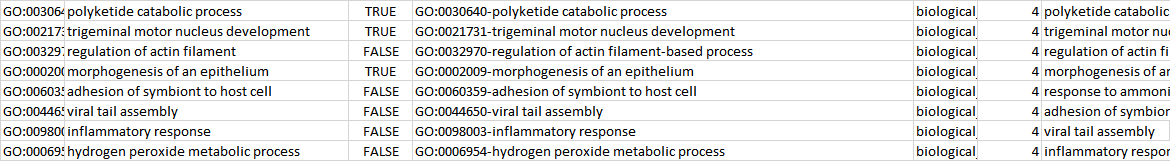

## I THINK IT MESSED UP BECAUSE OF THE "-" DELIMITER 
Lets try to fix that

In [44]:
bac_pseq_no_neg<-subset_samples(bac_pseq, sample_type!="neg_control")
bac_pseq_no_neg<-subset_samples(bac_pseq_no_neg, sample_type!="Unknown")

In [45]:
length(taxa_names(bac_pseq_no_neg))
length(get_taxa_unique(bac_pseq_no_neg,taxonomic.rank = "name")) 

[1] 13846

[1] 13774

## Well this is an issue lol

In [46]:
tax<-data.frame(tax_table(bac_pseq_no_neg))
names<-paste(rownames(tax),tax$name,sep="-")
length(names)
taxa_names(bac_pseq_no_neg)<-names

[1] 13846

Could it of really been that easy?

In [47]:
write.table(as.data.frame(tax_table(bac_pseq_no_neg)),file = "bac_pseq_no_neg_tax_table.tsv",sep = "\t")

WOW it really was that easy!  Problem Solved!